In [77]:
import sys, os
import numpy as np

sys.path += ['./datavyz', './neural_network_dynamics', './code']
from datavyz import graph_env_manuscript as ge

### A demo fig for the effect of CB1-signalling on L23 PN

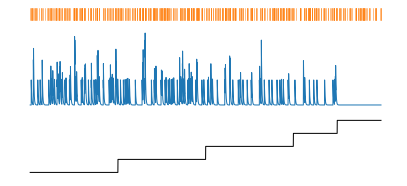

In [89]:
# Poisson process
CB1_rate = 150. # Hz
tstop, dt = 4., 1e-4
t = np.arange(int(tstop/dt))*dt
pre_events = np.cumsum(np.random.exponential(1./CB1_rate, int(1.5*tstop*CB1_rate)))
pre_events = pre_events[pre_events<tstop]

# synaptic integration
release_prob, Tau = 0.5, 5e-3
shifts = [0, 1, 2, 3, 3.5]
Nlevels = 4
signalling, current = 0*t, 0*t
for i, s in enumerate(shifts):
    signalling[t>s] = i/(len(shifts)-1)

fig, [ax1,ax2,ax3] = ge.figure(axes_extents=[[[1,1]],
                                        [[1,4]],
                                        [[1,3]]],
                    figsize=(2.5,.3), left=3)

sizes = {'spikes':1, 'current':3, 'signalling':3}
for e in pre_events:
    ax1.plot([e,e], [0,1], color=ge.orange, lw=0.5)
    it = int(e/dt)
    if np.random.uniform(0,1)<(release_prob*(1-signalling[it])):
        current[it:it+int(1/dt)] += np.exp(-(t[it:it+int(1/dt)]-t[it])/Tau) 
ax2.plot(t, current, lw=1)
ax3.plot(t, signalling, lw=1, color='k')
    
ge.draw_bar_scales(ax, Xbar=0.1, Xbar_label='0.1s', Ybar=1e-12, loc='bottom-right')
for ax in [ax1, ax2, ax3]:
    ge.set_plot(ax, [])#, ylim=[0, sizes['signalling']+sizes['currents']+sizes['currents']])
